# Car price prediction plays a crucial role in the automotive industry for various stakeholders, including manufacturers, dealerships, and consumers for example in Pricing Strategy, Demand Forecasting, Pricing Transparency etc.

# Objective:
# To predict car prices accurately using machine learning algorithms and comparing which model works better

In [1]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
car =  pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\data science asg nd notes\Internship\Assignment-6\car data.csv")

In [3]:
#Displaying the top 5 rows of the dataset
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Checking the last 5 rows of the dataset
car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
#Checking the shape of the Dataset
car.shape

(301, 9)

In [6]:
#Checkin the information of the dataset like the datatype of each feature column_names null values
#if any etc.

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#checking the null values

car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#getting the statistical information about the dataset for numerical columns

car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
#statistical information about categorical data

car.describe(include = "object")

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [10]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


DATASET PREPROCESSING:
We can check how old is the car year from the present date

HERE THE TARGET VARIABLE IS SELLING_PRICE

In [11]:
#present year
date_time = datetime.datetime.now()
date_time.year

2023

In [12]:
#creating a new column "AGE" to determine the age of the car
car["Age"] = date_time.year-car["Year"] 

In [13]:
car["Age"].head()

0     9
1    10
2     6
3    12
4     9
Name: Age, dtype: int64

In [14]:
# since we have the age lets drop the year column from the dataset

car.drop("Year", axis =1, inplace = True)

In [15]:
car.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


OUTLIER REMOVAL:

Lets check if we have any outliers present using BOX PLOT

<Axes: >

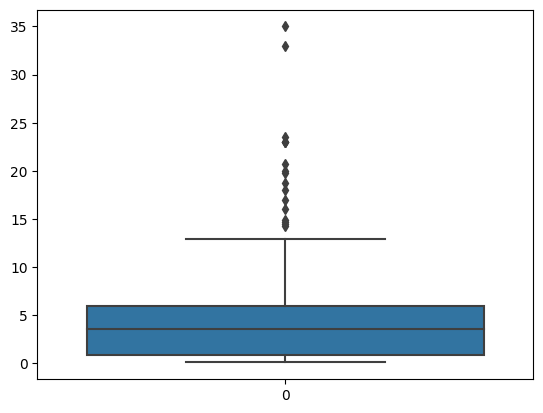

In [16]:
sns.boxplot(car["Selling_Price"])

In the above plot we can see two extreme outliers which we would like to remove aswe dont want our model to predict incorrect output

In [17]:
 # sorting the data in descending order to get the outlier rows at the top

sorted(car["Selling_Price"], reverse = True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [18]:
#Now we got the two oulier selling prices from the dataset.

car[(car["Selling_Price"]>=33.0) &(car["Selling_Price"]<=35.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,6
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,13


In [19]:
# we want to work on all the data apart from the above two rows

car[~(car["Selling_Price"]>=33.0) &(car["Selling_Price"]<=35.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [20]:
#checking the shape and we can see its now reduced as we removed outliers

car = car[~(car["Selling_Price"]>=33.0) &(car["Selling_Price"]<=35.0)]
car.shape

(299, 9)

ENCODING THE CATEGORICAL COLUMNS:

the model would not take the categorical data so have to convert them into numerical data

In [21]:
#checking the unique values in the categorical columns and mapping them accordingly
car["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [22]:
car["Fuel_Type"]= car["Fuel_Type"].map({'Petrol':0,'Diesel':1,'CNG':2})

In [23]:
car["Fuel_Type"].unique()

array([0, 1, 2], dtype=int64)

In [24]:
car["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [25]:
car["Seller_Type"]= car["Seller_Type"].map({'Dealer':0,'Individual':1})

In [26]:
car["Seller_Type"].unique()

array([0, 1], dtype=int64)

In [27]:
car["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
car["Transmission"] = car["Transmission"].map({'Manual':0,'Automatic':1})

In [29]:
car["Transmission"].unique()

array([0, 1], dtype=int64)

In [30]:
car.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


Train test split in X and Y variables

In [31]:
x = car.drop(["Car_Name","Selling_Price"], axis = 1)

In [32]:
x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,9
1,9.54,43000,1,0,0,0,10
2,9.85,6900,0,0,0,0,6
3,4.15,5200,0,0,0,0,12
4,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,7
297,5.90,60000,0,0,0,0,8
298,11.00,87934,0,0,0,0,14
299,12.50,9000,1,0,0,0,6


In [33]:
# y
y = car["Selling_Price"]
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = 42)

# LINEAR REGRESSION:
Linear regression is a widely used statistical technique for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the input variables and the output variable, where the goal is to find the best-fitting line that minimizes the difference between the predicted values and the actual values.

# RANDOM FOREST REGRESSOR:
Random Forest Regressor is a popular ensemble learning method for regression tasks. It combines the power of multiple decision trees to make accurate predictions. 

# GRADIENT BOOSTING REGREESOR:
Gradient Boosting Regressor is a powerful ensemble learning method for regression tasks. It is based on the concept of boosting, where weak models are combined sequentially to create a strong predictive model.

# XGB REGRESSOR:
The xgbRegressor, or XGBoost Regressor, is an implementation of the Gradient Boosting algorithm specifically designed for regression tasks. XGBoost stands for Extreme Gradient Boosting and has gained popularity due to its high performance and scalability.

# SUPPORT VECTOR REGRESSION:
Support Vector Regression (SVR) is a regression algorithm that utilizes the principles of Support Vector Machines (SVM) for solving regression problems. SVR aims to find a hyperplane that maximizes the margin while minimizing the deviation of the predicted targets from the actual targets.

MODEL TRAINING

In [35]:
lr = LinearRegression()
lr.fit(x_train,y_train)

rf= RandomForestRegressor()
rf.fit(x_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(x_train,y_train)

xg = XGBRegressor()
xg.fit(x_train,y_train)

svr = SVR()
svr.fit(x_train,y_train)

SVR()

PREDICTION ON TEST DATA

In [36]:
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = xgb.predict(x_test)
y_pred4 = xg.predict(x_test)
y_pred5 = svr.predict(x_test)

In [37]:
y_pred1, y_pred2,y_pred3,y_pred4,y_pred5

(array([ 8.30036864,  7.40609436,  1.3635628 ,  6.44983368, 12.55388289,
         4.43470453, 10.12201644,  1.79523758,  8.52406048, -1.17213486,
        11.71095302, -0.91214298, -0.07798904,  1.39477326,  9.88144028,
        10.94754277,  1.20584528,  2.00636527, 23.0010574 ,  0.77700686,
         0.87830197,  2.84465399,  5.68230398,  2.42169814,  2.4416452 ,
         8.86369338,  8.81965133,  1.20013042,  5.28285441,  5.16059621,
         7.83005308,  5.39942027,  6.72904806,  2.26710881,  8.41306659,
         6.41744778,  1.34363181, -8.71843775,  1.29210419, 11.80177332,
         8.08377832,  9.20775178,  1.70398951,  3.71481983,  0.95088992,
        -2.06431508,  9.13395372,  4.36845553,  4.73679445, -0.79736564,
         0.69672417,  0.23247666, 12.27379746,  9.61070616,  8.26866405,
         5.48445601,  3.75831031,  2.66202827,  9.90064527, 22.81704985]),
 array([ 9.7689,  8.0965,  0.4362,  6.939 , 14.2325,  5.261 ,  6.5955,
         1.1865,  8.035 ,  0.3333, 10.9625,  0.2133

EVALUATING THE ALGORITHM

In [38]:
# on the basis of r2_score evaluation the scores

score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)
score5 = metrics.r2_score(y_test, y_pred5)

In [39]:
print(f"the linear model score is: {score1}")

the linear model score is: 0.6790884983129397


In [40]:
print(f"the random forest model score is: {score2}")

the random forest model score is: 0.7342414022773517


In [41]:
print(f"the Gradient boosting  model score is: {score3}")

the Gradient boosting  model score is: 0.8857807671985286


In [42]:
print(f"the XGB model score is: {score4}")

the XGB model score is: 0.8864839405756888


In [43]:
print(f"the Support vector model score is: {score5}")

the Support vector model score is: -0.025998228488720354


The worst performance is of the SVM model , the best performance is of Gradient Boosting model with 89% score

In [44]:
#Showcasing the scores and the models in a dataframe

In [45]:
final_car = pd.DataFrame({"Models":['LR','RF','GBR','XG','SVR'],"R2_SCORE":[score1,score2,score3,
                                                                           score4,score5]})

In [46]:
final_car

,Models,R2_SCORE
0,LR,0.679088
1,RF,0.734241
2,GBR,0.885781
3,XG,0.886484
4,SVR,-0.025998


In [47]:
#plotting a barplot to showcase how each model performed as per the scores

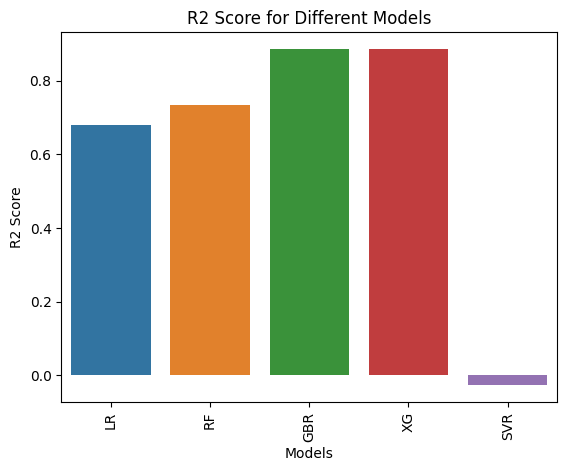

In [49]:
sns.barplot(x=final_car["Models"], y=final_car["R2_SCORE"])
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("R2 Score for Different Models")
plt.xticks(rotation=90)
plt.show()

We can predict from the above graph GBR is giving the best score however XG model is alsp pretty close

# Linear Regression:
Hyperparameter tuning: Linear regression has minimal hyperparameters to tune. The most common hyperparameter is the regularization parameter (alpha or lambda) in regularization techniques like Ridge or Lasso regression. You can use techniques like grid search or random search to find the optimal value for the regularization parameter.
Cross-validation: Cross-validation helps assess the model's performance and generalization ability. Techniques like k-fold cross-validation divide the data into k subsets (folds), train the model on k-1 folds, and evaluate on the remaining fold. This process is repeated k times, and the average performance metric is computed.


# XGBOOST:
XGBoost has numerous hyperparameters to optimize, including the number of trees, learning rate, maximum depth, subsampling ratio, and regularization parameters. You can use techniques like grid search, random search, or Bayesian optimization to search through the hyperparameter space and find the best combination.
Cross-validation: Cross-validation, such as k-fold cross-validation, can be used to estimate the model's performance on unseen data. It helps in assessing the model's generalization ability and detecting overfitting.

# Gradient Boosting Regressor:
Hyperparameter tuning: Gradient Boosting Regressor has hyperparameters similar to XGBoost, such as the number of trees, learning rate, maximum depth, subsampling ratio, and regularization parameters. Techniques like grid search, random search, or Bayesian optimization can be used to find the optimal hyperparameters.
Cross-validation: Cross-validation, like k-fold cross-validation, helps evaluate the model's performance and ensures robustness by assessing its performance on different subsets of the data.

# Random Forest Regressor:
Hyperparameter tuning: Random Forest Regressor has hyperparameters such as the number of trees, maximum depth, minimum samples required to split a node, and maximum features to consider. Grid search, random search, or Bayesian optimization can be used to find the best hyperparameters.
Cross-validation: Cross-validation techniques help evaluate the model's performance, assess variance, and avoid overfitting. Techniques like k-fold cross-validation can be employed.

# Support Vector Regression (SVR):
Hyperparameter tuning: SVR has hyperparameters like the choice of kernel (linear, polynomial, or radial basis function), regularization parameter (C), and kernel-specific parameters (e.g., degree for polynomial kernel, gamma for RBF kernel). Grid search or random search can be used to find the optimal hyperparameters.
Cross-validation: Cross-validation techniques help estimate the model's performance and assess its generalization ability. K-fold cross-validation or stratified k-fold cross-validation can be used for SVR.